In [94]:
#basic 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [95]:
data={'Hours':[1,2,4,5,6],'Marks':[50,60,80,90,100]}

In [96]:
df=pd.DataFrame(data)
print(df)

   Hours  Marks
0      1     50
1      2     60
2      4     80
3      5     90
4      6    100


In [97]:
X=df[['Hours']].values
y=df[['Marks']].values

In [98]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [99]:
slope=model.coef_[0]
intercept=model.intercept_

In [100]:
print(slope)
print(intercept)
#eq of linear regression =mx+c
#y=10x+40


[10.]
[40.]


In [101]:
df['Predicted Marks']=model.predict(X)
df.head()

,Hours,Marks,Predicted Marks
0,1,50,50.0
1,2,60,60.0
2,4,80,80.0
3,5,90,90.0
4,6,100,100.0


In [102]:
hours_to_predict=np.array([[3]])
predicted_grade=model.predict(hours_to_predict)[0]
print(predicted_grade)

[70.]


In [103]:
##by krish naiak

# linear regression


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [140]:
#for multiple linear regression
data1 = pd.read_csv("student_performance_regression.csv")
data1

,Hours_Studied,Attendance(%),Sleep_Hours,Previous_Score,Final_Score
0,2,60,6.0,50,55
1,3,75,6.5,58,61
2,4,80,7.0,65,69
3,5,90,6.5,70,75
4,6,95,7.0,72,78
5,7,96,7.5,80,84
6,8,98,8.0,85,90
7,9,99,7.5,90,95
8,10,100,8.0,92,97
9,11,100,7.0,95,99


In [171]:
y = data1['Final_Score']
X = data1.drop('Final_Score', axis=1)


In [172]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.30, random_state=42)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [174]:
X_train=scaler.fit_transform(X_train)

In [175]:
X_test=scaler.transform(X_test)

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
# Moved up here before using in cross_val_score
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [178]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse


array([-0.93557099, -2.55486968, -0.02090797, -0.06097519, -1.5625    ])

In [179]:
np.mean(mse)

-1.0269647676486529

In [180]:
from sklearn.linear_model import LinearRegression

In [186]:
regression.fit(X_train, y_train)


LinearRegression()

In [187]:
reg_pred= regression.predict(X_test) 

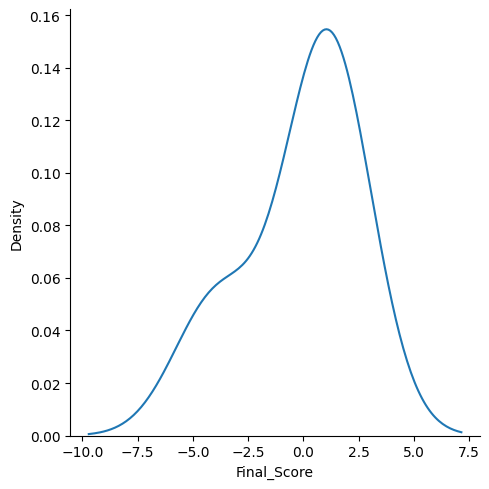

In [188]:
import seaborn as sns 
sns.displot(reg_pred-y_test,kind='kde')

In [189]:
from sklearn.metrics import r2_score

In [190]:
score=r2_score(reg_pred,y_test)
score

0.9880686683809373

# Ridge Regression and Lasso REGRESSION

In [191]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [192]:
ridge_regressor=Ridge() ##by defaultalpha=1.0

In [193]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [194]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [195]:
print(ridgecv.best_params_)

{'alpha': 1}


In [196]:
print(ridgecv.best_score_) ##not good than linear reg

-7.504682602320278


In [200]:
ridge_pred=ridgecv.predict(X_test)


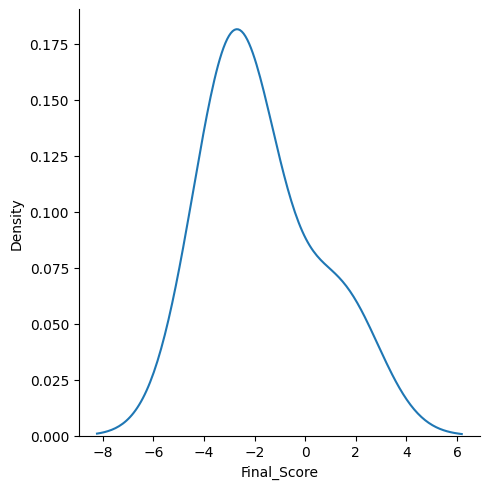

In [201]:
import seaborn as sns 
sns.displot(ridge_pred-y_test,kind='kde')

In [203]:
score=r2_score(ridge_pred,y_test)
score

0.9815873766106309

# Lasso REGRESSION

In [212]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [213]:
lasso=Lasso()

In [214]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso

Lasso()

In [215]:
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [216]:
print(lassocv.best_params_)

{'alpha': 1}


In [217]:
print(lassocv.best_score_)

-8.080782763976362


In [218]:
lasso_pred=lassocv.predict(X_test)

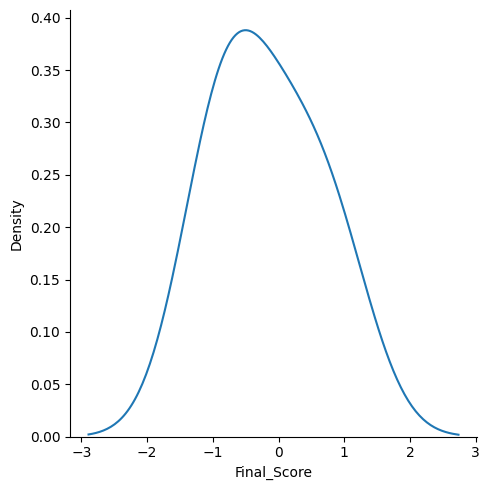

In [219]:
import seaborn as sns 
sns.displot(lasso_pred-y_test,kind='kde')

In [220]:
score=r2_score(lasso_pred,y_test)
score

0.9984021669434425